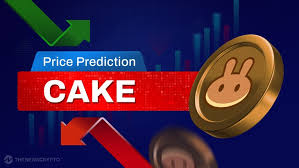

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error

In [102]:
def wrangle(data_path):
    cake_data = pd.read_csv(data_path)

    # Displaying the initial observations
    print("Initial Observations:")
    print(cake_data.head(10))
    print()

    # Conducting an examination of data types and missing values
    print("Info about data:")
    print(cake_data.info(show_counts=True))
    print()

    # Check for duplicated rows
    print("Number of duplicated rows:", cake_data.duplicated().sum())
    print()

    cake_data.drop_duplicates(inplace=True)
    print("Number of duplicated rows after dropping:", cake_data.duplicated().sum())
    print()
    # Descriptive statistics
    print("Descriptive Statistics:")
    print(cake_data.describe())
    print()

    return cake_data

# Example usage
data_path = "dataset.csv"
data = wrangle(data_path)

Initial Observations:
     Sold_On    Size  Ingredients_Cost Design_Complexity  Time_Taken  Price  \
0     Monday   large                28           complex           6     49   
1   Saturday  medium                65            simple           2     93   
2  Wednesday   large                96            simple           5    128   
3    Tuesday  medium               155            simple           3    198   
4   Saturday   large                20            simple           2     32   
5     Sunday   large               127            simple           5    159   
6   Saturday   large               160           complex           4    230   
7   Thursday  medium               137            simple           5    185   
8     Friday   small                36            simple           3     57   
9   Saturday   large                66            simple           2     79   

   Amount  Gender  
0      10  female  
1       9  female  
2       8    male  
3       6  female  
4       

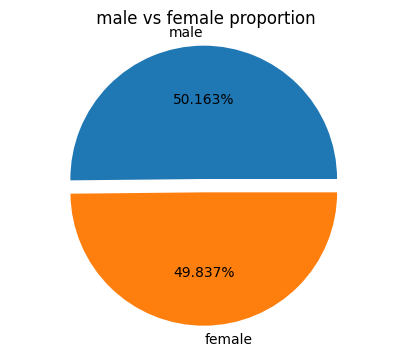

In [103]:
totalSex = data.Gender.value_counts().reset_index()
plt.figure(figsize=(5,4))
plt.pie(totalSex['count'],labels=totalSex['Gender'], autopct="%1.3F%%" , explode=[0.1,0])
plt.title(" male vs female proportion")
plt.axis('equal')
plt.show()

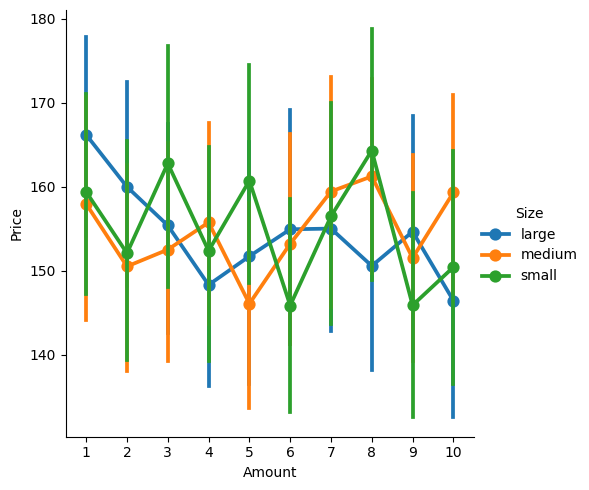

In [104]:
sns.catplot(y = 'Price', x='Amount', hue='Size',kind='point', data=data)


In [105]:
# Step 1: Identify string columns and convert them to a list
string_col = data.select_dtypes(include='object').columns.to_list()

# Step 2: Create a list of all columns in the dataframe
all_columns = data.columns.to_list()

# Step 3: Remove string columns from the list of all columns to get numeric columns
num_col = [col for col in all_columns if col not in string_col]

# Display the results
print("String columns:", string_col)
print("Numeric columns:", num_col)

String columns: ['Sold_On', 'Size', 'Design_Complexity', 'Gender']
Numeric columns: ['Ingredients_Cost', 'Time_Taken', 'Price', 'Amount']


In [106]:
import plotly.express as px
fig = px.histogram(data, x = 'Sold_On', color = 'Amount',
                   hover_data = data.columns,
                   title = 'Distribution of the Sold_On with respect to Amount of the cake',
                   barmode = 'group')
fig.show()

In [107]:
import plotly.express as px
fig = px.histogram(data, x = 'Design_Complexity', color = 'Size',
                   hover_data = data.columns,
                   title = 'Distribution of the Design_Complexity with respect to size of the cake',
                   barmode = 'group')
fig.show()

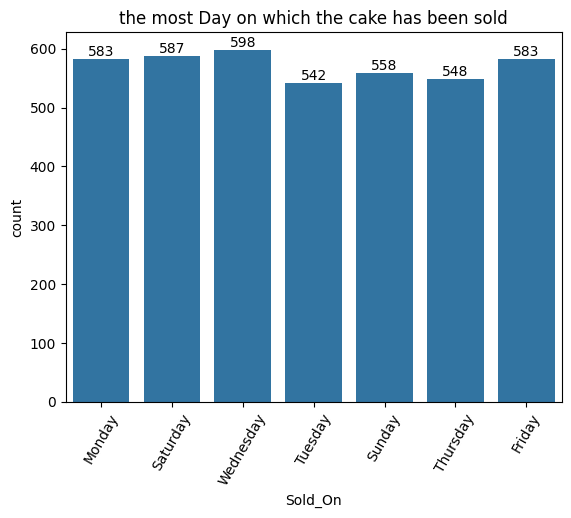

In [108]:
ax = sns.countplot(x = 'Sold_On', data = data)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 60)
plt.title('the most Day on which the cake has been sold')
plt.show()

**The most day on which the cake has been sold is wednesday**

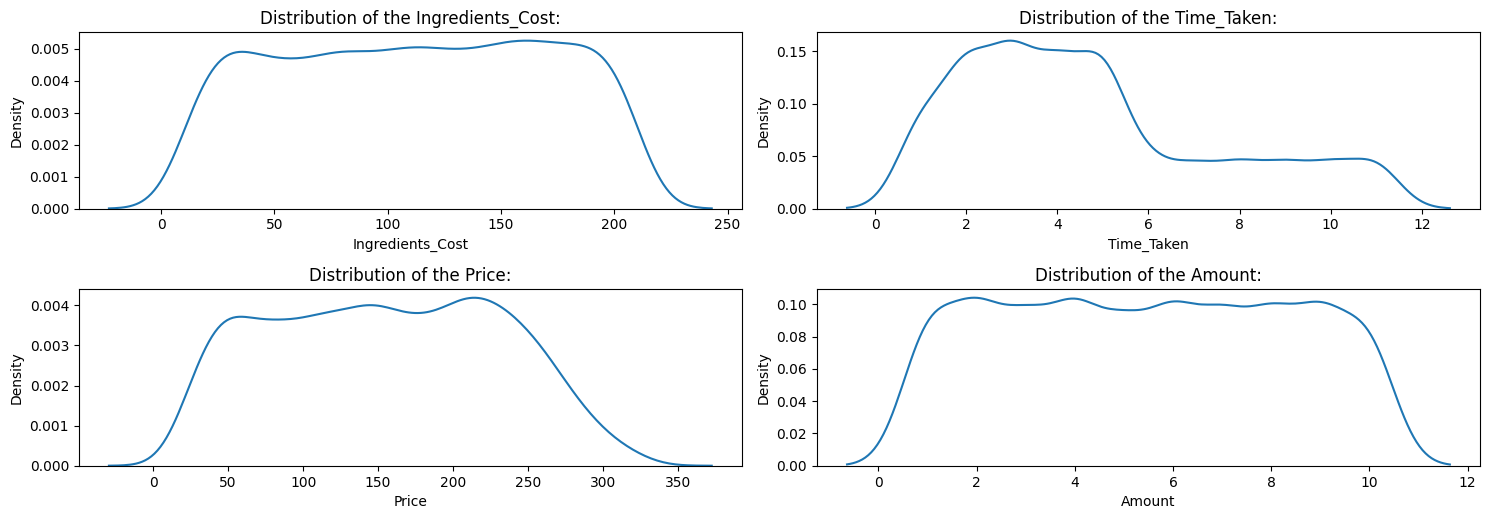

In [109]:
# plot the distribution graph and look for skewness of features
plt.figure(figsize = (15, 10))
for i, col in enumerate(data[num_col], 1):
    plt.subplot(4, 2, i)
    plt.title(f'Distribution of the {col}:')
    sns.kdeplot(data[col])
    plt.tight_layout()
    plt.plot()

In [110]:
# Separate features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns

# Encode categorical variables using pd.get_dummies()
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [111]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = lr_model.score(X_test, y_test)
print('the accuracy of the linear regression model is: {:.2f}%'.format(acc_lr * 100))


the accuracy of the linear regression model is: 97.44%


In [112]:
from sklearn.svm import SVR
svr_model = SVR(kernel = 'rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
acc_svr = r2_score(y_test, y_pred_svr)
print('the accuracy of the support vector regression model is: {:.2f}%'.format(acc_svr * 100))

the accuracy of the support vector regression model is: 94.70%


In [113]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines',
              'linear regression'],
    'Score': [acc_svr, acc_lr]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,linear regression,0.974426
0,Support Vector Machines,0.947034


# **Linear Regression is the most accurate (97.44%)**